# การทดลองที่4 : การทดลองปรับค่าพารามิเตอร์เพื่อสร้างโมเดลการแนะนำสินค้าและการจัดกลุ่ม

## ตอนที่ 1: การทดลองเตรียมข้อมูลและแสดงรายละเอียดข้อมูลเชิงกราฟ

### 1.1 Import Lib (numpy, pandas, matplotlib, sklearn, datetime)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer

### 1.2 โหลดข้อมูล MovieLens Dataset file (‘ratings.csv’, ‘movies.csv’, ‘tags.csv’) โดยใช้

In [2]:
data_movies = pd.read_csv('./ml-latest-small/movies.csv')
data_links = pd.read_csv('./ml-latest-small/links.csv')
data_ratings = pd.read_csv('./ml-latest-small/ratings.csv')
data_tags = pd.read_csv('./ml-latest-small/tags.csv')

### 1.3 Data Preprocessing

#### 1.3.1 Data Cleaning

In [3]:
def cleanning(data):
    #clear missing value with median
    data = data.fillna(data.median())
    
    #drop duplicate
    data = data.drop_duplicates()
    
    return data

In [4]:
cleanning(data_movies)
cleanning(data_links)
cleanning(data_ratings)
cleanning(data_tags)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### 1.3.2 Data Preparation

##### - เตรียมข้อมูล movie rating ด้วยการดึงข้อมูลปีคศ. (‘year’) จากข้อมูล UTC ‘timestamp’ 

In [5]:
def getyear():
    array = []
    for i in data_ratings['timestamp']:
        array.append(datetime.fromtimestamp(i).year)
    return array
year = getyear()
data_ratings['year'] = year
data_ratings

,userId,movieId,rating,timestamp,year
0,1,1,4.0,964982703,2000
1,1,3,4.0,964981247,2000
2,1,6,4.0,964982224,2000
3,1,47,5.0,964983815,2000
4,1,50,5.0,964982931,2000
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017
100832,610,168248,5.0,1493850091,2017
100833,610,168250,5.0,1494273047,2017
100834,610,168252,5.0,1493846352,2017


##### - เตรียมข้อมูล movie genre feature โดยกำหนดให้มีคอลัมน์ดังนี้โดยกำหนดให้ปรับรูปแบบ genres เป็น multi-label binarization

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
all_movie = []
for i in data_movies['genres']:
    genre = i.split('|')
    all_movie.append(genre)
print(np.array(all_movie))
array = mlb.fit_transform(all_movie)
array

[list(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'])
 list(['Adventure', 'Children', 'Fantasy']) list(['Comedy', 'Romance'])
 ... list(['Drama']) list(['Action', 'Animation']) list(['Comedy'])]


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
#select movieId and title column from movies
start_col=['movieId','title']
df_movies = pd.DataFrame(data_movies,columns=start_col)

In [8]:
#crete genres to multilabel binarization
li = array
df_genres = pd.DataFrame(data = li, columns= list(mlb.classes_))

In [9]:
#concatinate two dataframe
df_movie_genre = pd.concat([df_movies, df_genres], axis=1, sort=False)
df_movie_genre

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 Data Visualization แสดงกราฟข้อมูลการเปลี่ยนแปลงของ movie genres และ movie rating ในแต่ละปี

In [10]:
year_movies = []
for s in df_movie_genre['title']:
    s = s[-7:-1] 
    s = s.replace("(", "")
    s = s.replace(")","")
    try:
        year_movies.append(int(s))
    except:
        year_movies.append(np.nan)

In [11]:
df_movie_genre['year']=year_movies
df_movie_genre = df_movie_genre.dropna()
df_movie_genre

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995.0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995.0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9738,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9739,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018.0


In [12]:
#กราฟที่ 1: แสดงกราฟค่า  จำนวน released moviesในแต่ละปี
year_release = df_movie_genre.groupby('movieId').first() # Print the first value in each group 
df_release =year_release.groupby('year')["year"].count()
df_release

year
1902.0      1
1903.0      1
1908.0      1
1915.0      1
1916.0      4
         ... 
2014.0    278
2015.0    274
2016.0    218
2017.0    147
2018.0     41
Name: year, Length: 106, dtype: int64

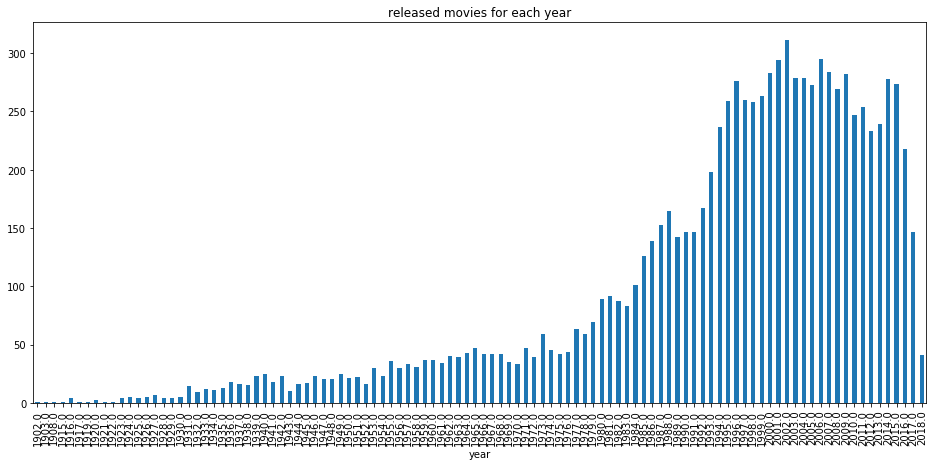

In [13]:
fig,ax = plt.subplots(figsize=(16,7))
df_release.plot(ax=ax,kind='bar',title = 'released movies for each year')

In [14]:
#กราฟที่ 2: แสดงกราฟค่า จำนวนการให้ Rating ในแต่ละปี
each_year = data_ratings.groupby('year')["year"].count()
each_year

year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3274
2005     5818
2006     4059
2007     7110
2008     4349
2009     4163
2010     2301
2011     1690
2012     4657
2013     1664
2014     1439
2015     6616
2016     6701
2017     8200
2018     6418
Name: year, dtype: int64

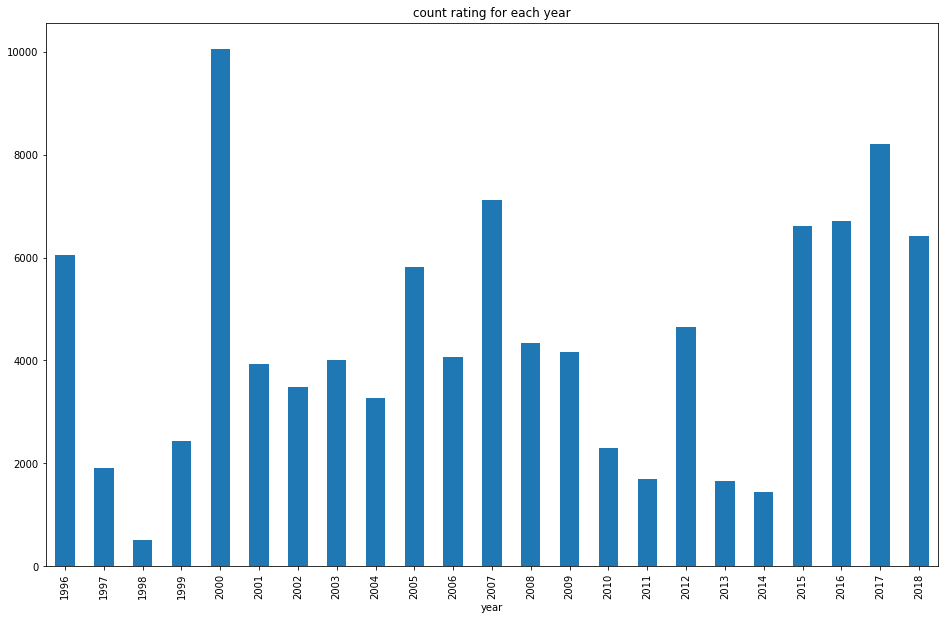

In [15]:
fig,ax = plt.subplots(figsize=(16,10))
data_ratings.groupby('year')["year"].count().plot(ax=ax,kind='bar',title = 'count rating for each year')

In [16]:
#กราฟที่ 3: แสดงกราฟค่า จำนวน movies ในแต่ละ genre
df_movie_genre.sum(axis='rows').iloc[2:]

(no genres listed)             25
Action                       1827
Adventure                    1263
Animation                     611
Children                      664
Comedy                       3756
Crime                        1199
Documentary                   440
Drama                        4359
Fantasy                       779
Film-Noir                      87
Horror                        978
IMAX                          158
Musical                       334
Mystery                       573
Romance                      1596
Sci-Fi                        978
Thriller                     1892
War                           382
Western                       167
year                  1.94056e+07
dtype: object

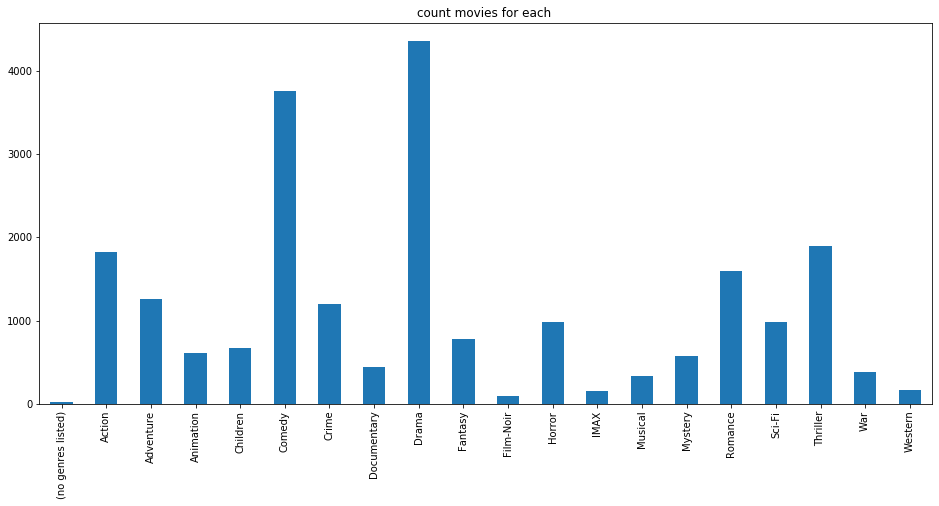

In [17]:
fig,ax = plt.subplots(figsize=(16,7))
df_movie_genre.sum(axis='rows').iloc[2:-1].plot(ax=ax,kind='bar',title = 'count movies for each ')

In [18]:
#กราฟที่ 4: แสดงกราฟ (y-axis: stacked graph) ค่าจำนวน movie แต่ละ genreในแต่ละปี (x-axis)


In [19]:
df_release.sum(axis=0)

9729

In [20]:
df = df_movie_genre.groupby('year').sum()
df

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
1902.0,32898,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1903.0,49389,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1908.0,140541,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1915.0,7065,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1916.0,245294,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,33470061,0,62,35,15,15,116,38,17,117,...,0,28,14,5,16,35,32,60,8,3
2015.0,37931772,3,63,45,19,14,104,30,19,101,...,0,36,1,1,16,21,41,57,2,4
2016.0,34548673,7,48,36,22,13,75,15,13,69,...,0,16,0,0,8,18,29,41,3,1


In [21]:
col = df_movie_genre.columns
col = col[2:-1]
col

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [22]:
df = pd.DataFrame(df,columns=col)
df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1902.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1903.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1908.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1915.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1916.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,0,62,35,15,15,116,38,17,117,15,0,28,14,5,16,35,32,60,8,3
2015.0,3,63,45,19,14,104,30,19,101,21,0,36,1,1,16,21,41,57,2,4
2016.0,7,48,36,22,13,75,15,13,69,22,0,16,0,0,8,18,29,41,3,1


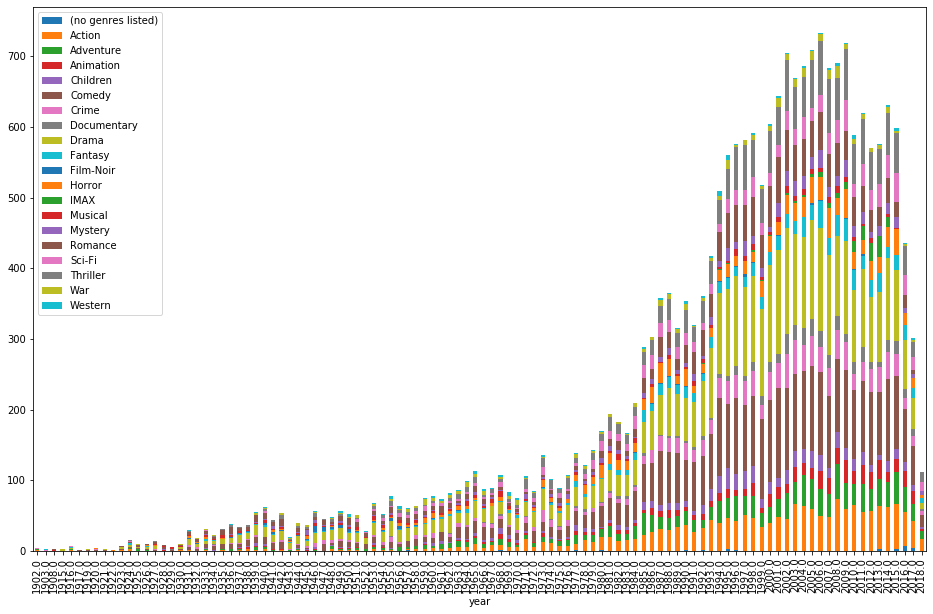

In [23]:
fig,ax = plt.subplots(figsize=(16,10))
df.plot(ax=ax,kind='bar',stacked = True)

In [24]:
# กราฟที่ 5: แสดงกราฟ Histogram ของการกระจายของค่าเฉลี่ย movie rating ใน dataset
df_hist = data_ratings.groupby('movieId').mean()
df_hist

df_hist = pd.DataFrame(df_hist,columns=['rating'])
df_hist = df_hist.reset_index()

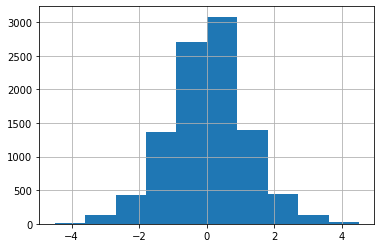

In [25]:
df_hist['rating'].diff().hist(bins=10)